Работа с make_moons data и GridSearchCV

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, KFold
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
grid_searcher = GridSearchCV(KNeighborsClassifier(),
                             param_grid={'n_neighbors': range(1, 21, 1)},
                             cv=KFold(n_splits=5, random_state=10, shuffle=True))

In [ ]:
grid_searcher.fit(X_train, y_train);

In [ ]:
best_predictions = grid_searcher.predict(X_test)

In [ ]:
accuracy_score(y_test, best_predictions)

0.81

Функция train_grid_search принимает выборку на вход. Она создает объект GridSearchCV, который перебирает соседей от одного до 20. Код ниже строит изображения средней зависимости качества от количества соседей.


In [ ]:
def train_grid_search(X, y):
  grid_searcher = GridSearchCV(KNeighborsClassifier(),
                             param_grid={'n_neighbors': range(1, 21, 1)})
  grid_searcher.fit(X, y)
  return grid_searcher.cv_results_['mean_test_score']




mean_test_scores = []
for i in range(1000):
  X, y = make_moons(n_samples=1000, noise=0.5)
  mean_test_score = train_grid_search(X, y)
  mean_test_scores.append(mean_test_score)

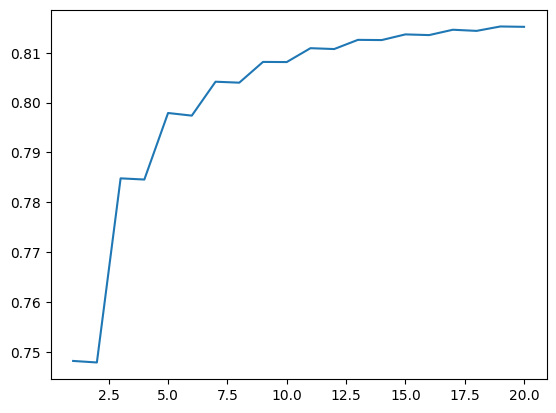

In [ ]:
mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

MNIST KNN Classifier

In [ ]:
!pip install python-mnist
!mkdir dir_with_mnist_data_files
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!mv train-images-idx3-ubyte.gz dir_with_mnist_data_files
!mv train-labels-idx1-ubyte.gz dir_with_mnist_data_files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-06-05 11:24:36--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.64.80.1, 2606:4700:3036::ac43:ab4c, 2606:4700:3034::6815:1d24
Connecting to yann.lecun.com (yann.lecun.com)|172.64.80.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2023-06-05 11:24:36 (93.4 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-06-05 11:24:36--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.64.80.1, 2606:4700:3036::ac43:ab4c, 2606:4700:3034::6815:1d24
Connecting to yann.lecun.com (yann.lecun.com)|172.64.80.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2

In [ ]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
mndata = MNIST('./dir_with_mnist_data_files', gz=True)
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)

In [ ]:
grid_searcher = GridSearchCV(KNeighborsClassifier(),
                             param_grid={'n_neighbors': 30})

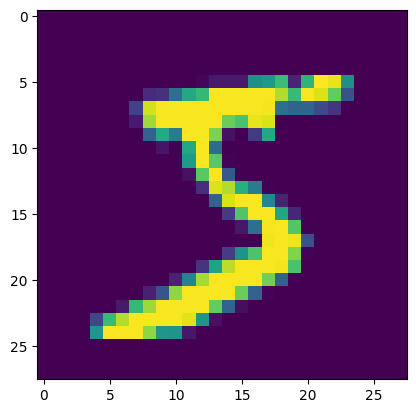

In [ ]:
plt.imshow(images[0].reshape(28, 28))

Работа с датасетом MNIST, обучена KNN с 30 ближайшими соседями.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

mnist_searcher = KNeighborsClassifier(n_neighbors = 30)


In [ ]:
mnist_searcher.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
best_predictions = mnist_searcher.predict(X_test)
accuracy_score(y_test, best_predictions)

0.9554166666666667